In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score ,mean_squared_error

In [2]:
x_train = pd.read_csv("datas/split/X_train.csv")
x_test = pd.read_csv("datas/split/X_test.csv")
y_train = pd.read_csv("datas/split/y_train.csv")
y_test = pd.read_csv("datas/split/y_test.csv")

In [3]:
model = LinearRegression()
model.fit(x_train ,y_train)

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(y_train,y_train_predict))

      
y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(y_test,y_test_predict))

acc of train 0.6244347011862571
acc of test 0.6364677858583219


In [4]:
model = LinearRegression()
model.fit(x_train ,np.log(y_train))

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(np.log(y_train),y_train_predict))

      
y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(np.log(y_test)
                               ,y_test_predict))

acc of train 0.68463777118287
acc of test 0.6920971885264013


In [5]:
model = DecisionTreeRegressor(max_depth=6)
model.fit(x_train ,np.log(y_train))

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(np.log(y_train),y_train_predict))

      
y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(np.log(y_test)
                               ,y_test_predict))

acc of train 0.8022957413327692
acc of test 0.7704137219776326


In [6]:
model = DecisionTreeRegressor(max_depth=6,max_leaf_nodes=42)
model.fit(x_train ,np.log(y_train))

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(np.log(y_train),y_train_predict))

      
y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(np.log(y_test)
                               ,y_test_predict))

acc of train 0.7909967381712387
acc of test 0.7649003261374531


In [7]:
model = DecisionTreeRegressor(max_depth=6,max_leaf_nodes=42,max_features=50)
model.fit(x_train ,np.log(y_train))

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(np.log(y_train),y_train_predict))

      
y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(np.log(y_test)
                               ,y_test_predict))

acc of train 0.7909967381712387
acc of test 0.764900326137453


In [8]:
model = RandomForestRegressor(n_estimators=100 , max_depth=6,max_leaf_nodes=42,max_features=50)
model.fit(x_train ,np.log(y_train))

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(np.log(y_train),y_train_predict))

      
y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(np.log(y_test)
                               ,y_test_predict))

/Users/ymokay/Regression_marche_auto/venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


acc of train 0.8229670896562337
acc of test 0.7935931016736498


In [ ]:
# model = XGBRegressor(n_estimators=60 , max_depth=4)
# model.fit(x_train ,np.log(y_train))

# y_train_predict = model.predict(x_train)

# print('acc of train' , r2_score(np.log(y_train),y_train_predict))

      
# y_test_predict = model.predict(x_test)

# print('acc of test' , r2_score(np.log(y_test)
#                                ,y_test_predict))

NameError: name 'XGBRegressor' is not defined

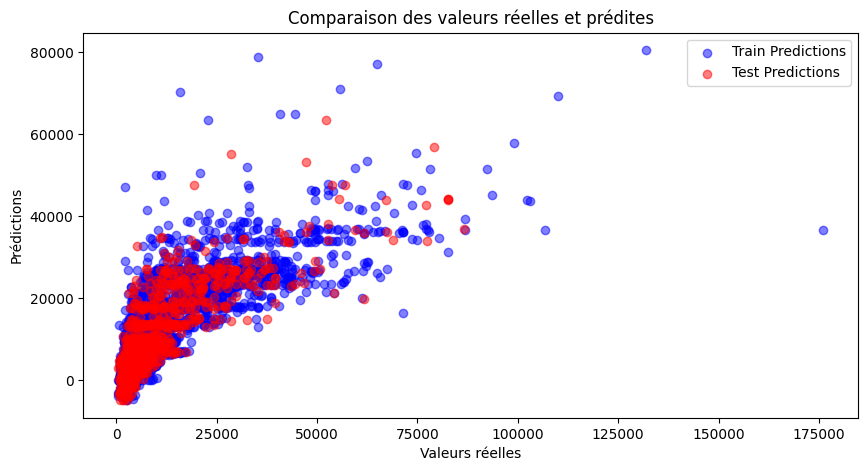

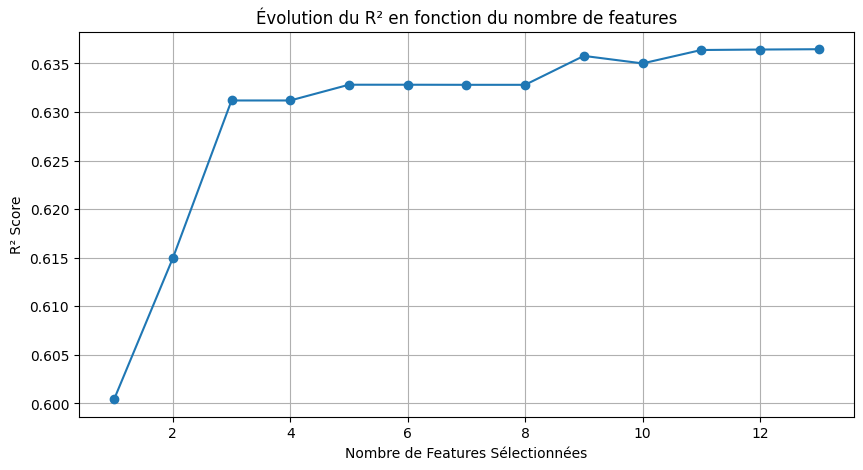

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Charger les données
X_train = pd.read_csv("datas/split/X_train.csv")
X_test = pd.read_csv("datas/split/X_test.csv")
y_train = pd.read_csv("datas/split/y_train.csv").values.ravel()
y_test = pd.read_csv("datas/split/y_test.csv").values.ravel()

# Initialiser et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 📊 Comparaison des valeurs réelles et prédites
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label="Train Predictions")
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5, label="Test Predictions")
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Comparaison des valeurs réelles et prédites")
plt.legend()
plt.show()

# 📈 Évolution du R² avec le nombre de features sélectionnées (RFE)
n_features = range(1, len(X_train.columns) + 1)
r2_scores = []

for n in n_features:
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=n)
    rfe.fit(X_train, y_train)
    y_test_pred_rfe = rfe.predict(X_test)
    r2_scores.append(r2_score(y_test, y_test_pred_rfe))

plt.figure(figsize=(10, 5))
plt.plot(n_features, r2_scores, marker='o', linestyle='-')
plt.xlabel("Nombre de Features Sélectionnées")
plt.ylabel("R² Score")
plt.title("Évolution du R² en fonction du nombre de features")
plt.grid()
plt.show()